In [5]:
import pandas as pd
import lime.lime_tabular
import shap
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
### Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc


### Some cosmetics add-ons
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [7]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [8]:
df.shape

(4026, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Number of Storeys(NS)           4026 non-null   int64  
 1   Height of Structure(HS)         4026 non-null   int64  
 2   Number of Spans(HSP)            4026 non-null   int64  
 3   Length of Spans (LS)            4026 non-null   float64
 4   Opening percentage (OP)         4026 non-null   int64  
 5   Masonry wall Stiffness Et (MS)  4026 non-null   float64
 6   Period (P)                      4026 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 220.3 KB


In [10]:
df.describe()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffness Et (MS),Period (P)
count,4026.000000,4026.000000,4026.000000,4026.000000,4026.000000,4026.000000,4026.000000
mean,11.500000,34.501490,4.950820,4.991803,63.083706,11.761736,1.104906
std,6.345077,19.032998,1.548252,1.577421,40.140099,7.786744,0.785109
min,1.000000,3.000000,2.000000,3.000000,0.000000,2.250000,0.039900
25%,6.000000,18.000000,4.000000,3.000000,25.000000,4.500000,0.446000
50%,11.500000,34.500000,6.000000,4.500000,75.000000,11.250000,0.907000
75%,17.000000,51.000000,6.000000,6.000000,100.000000,20.000000,1.609250
max,22.000000,66.000000,6.000000,7.500000,100.000000,25.000000,3.565800


In [11]:
data1= df.copy()

In [12]:
target = 'Period (P)'
features_list = list(data1.columns)
features_list.remove(target)
features_list

['Number of Storeys(NS)',
 'Height of Structure(HS)',
 'Number of Spans(HSP)',
 'Length of Spans (LS)',
 'Opening percentage (OP)',
 'Masonry wall Stiffness Et (MS)']

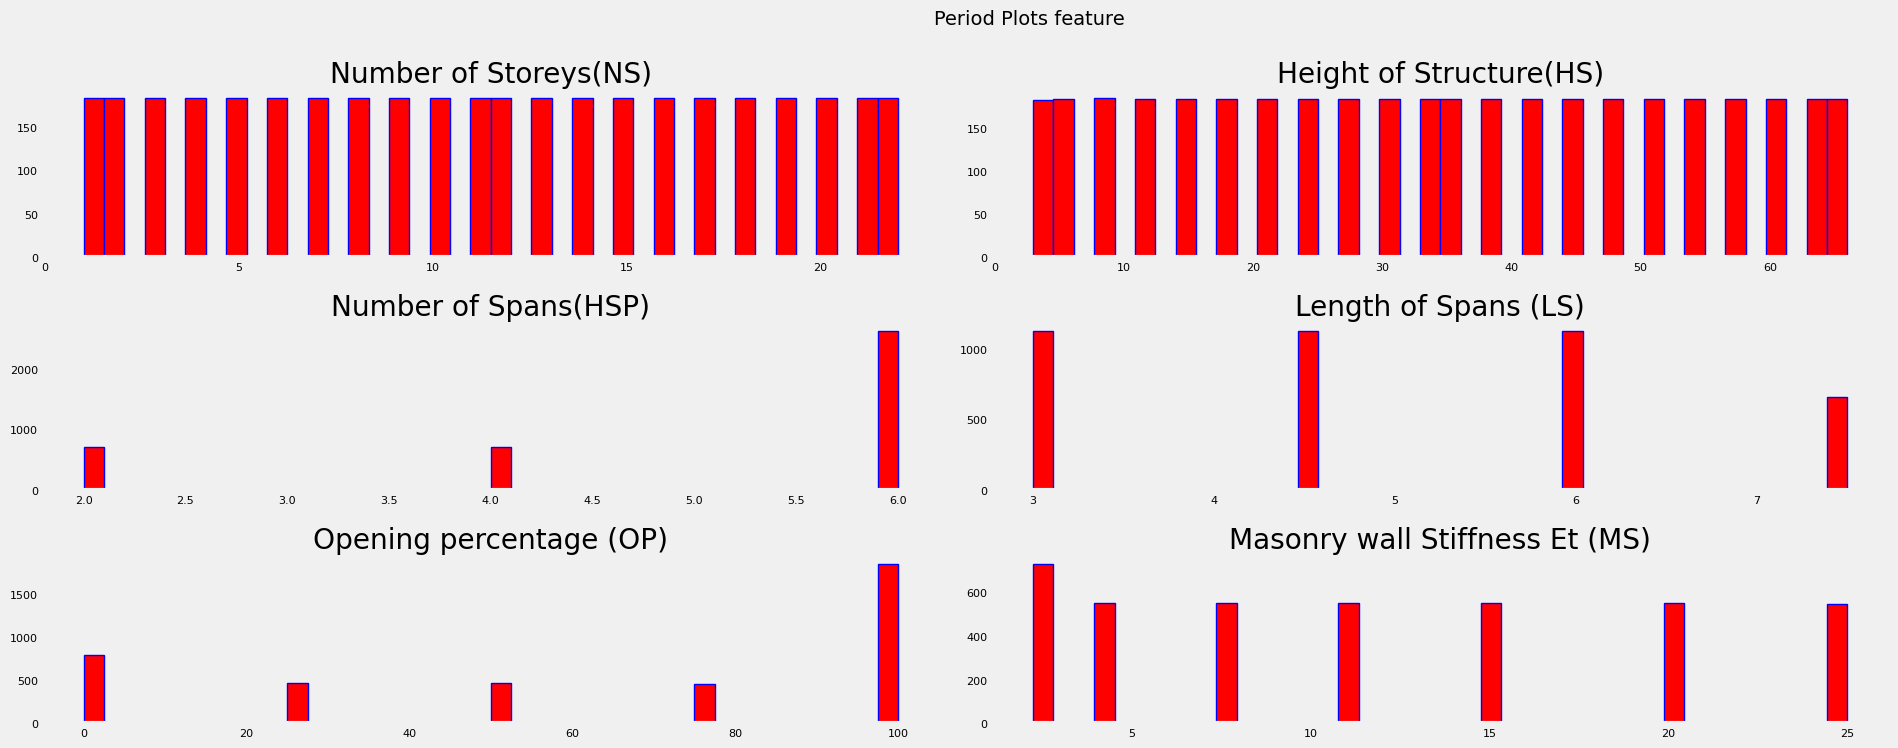

In [13]:
data1[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='r')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Period Plots feature', x=0.65, y=1.25, fontsize=14); 

In [14]:
data1 = data1.astype(float)

In [15]:
feature_names = data1.columns.tolist()

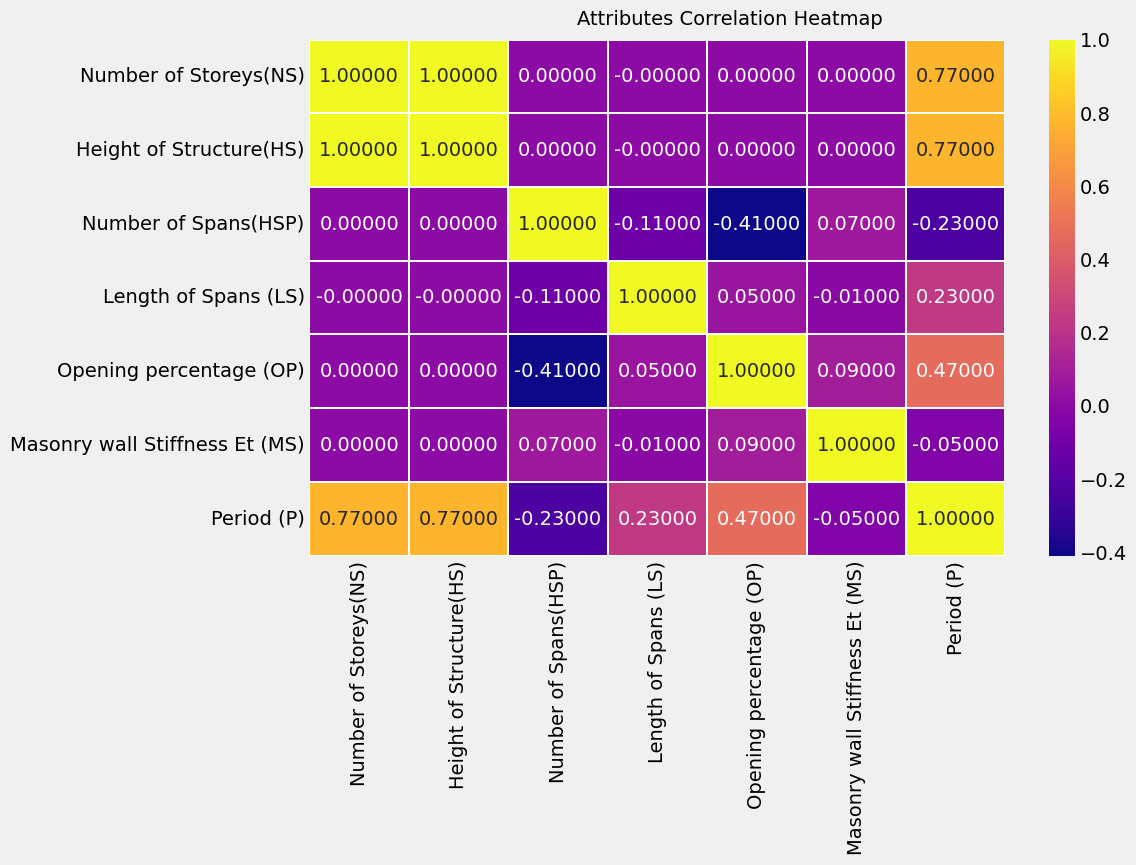

In [16]:
# for visualizing correlations
f, ax = plt.subplots(figsize=(10, 6))
corr = data1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="plasma",fmt='.5f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

In [17]:
X=df.drop("Period (P)" ,axis=1)
y=df["Period (P)"]

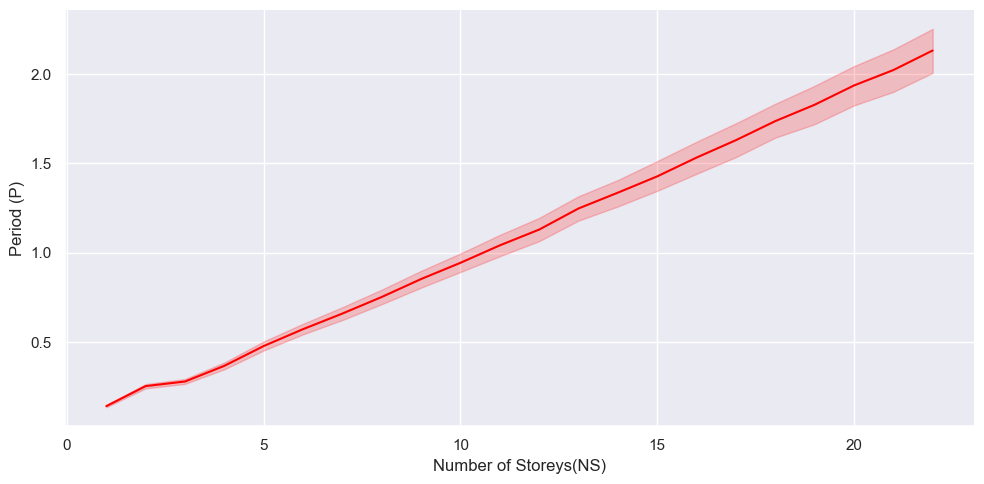

In [18]:
sns.set()
sns.relplot(data=data1, x='Number of Storeys(NS)', y=target, kind='line', height=5, aspect=2, color='red');    

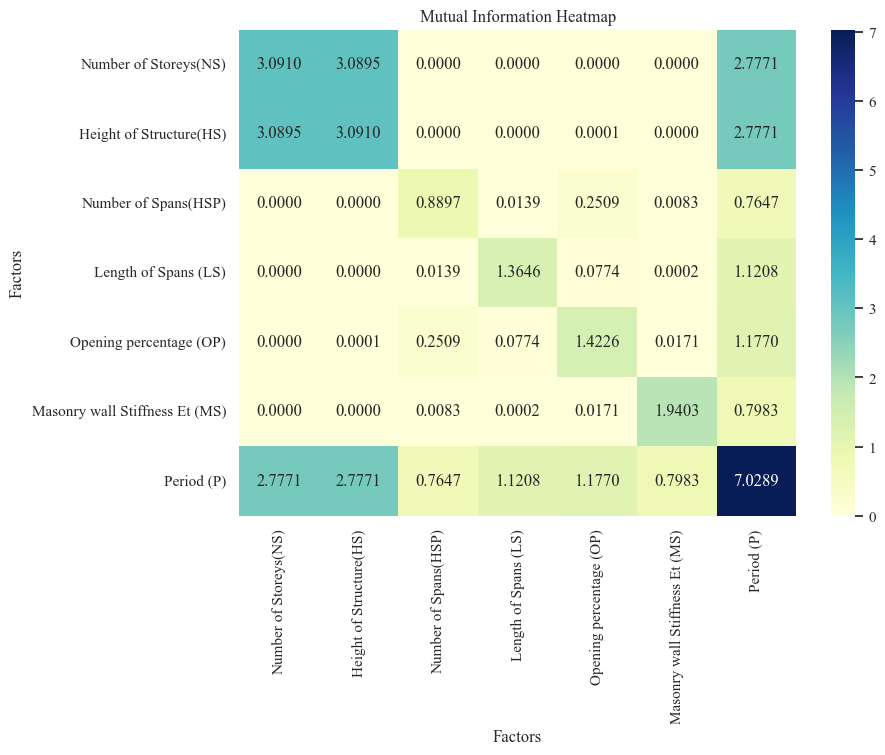

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from sklearn import preprocessing
import matplotlib

# Set font to New Roman and size to 12
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 12

# Load data from Excel
df = pd.read_excel(r"../dataset/data.xlsx", sheet_name="Sheet1")
feature_names = df.columns.tolist()

# Preprocess data (you can skip scaling if you prefer)
data = df.values
data_scaled = preprocessing.scale(data)

# Calculate mutual information
mi_matrix = np.zeros((data.shape[1], data.shape[1]))
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        mi_matrix[i, j] = mutual_info_score(data_scaled[:, i], data_scaled[:, j])

# Plot heatmap with scientific notation for values
plt.figure(figsize=(8, 6))
sns.heatmap(mi_matrix, annot=True, fmt=".4f", cmap='YlGnBu', xticklabels=feature_names, yticklabels=feature_names)
plt.title('Mutual Information Heatmap')
plt.xlabel('Factors')
plt.ylabel('Factors')
plt.show()